In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

import scienceplots
plt.style.use(['science'])
plt.rcParams['axes.labelsize'] = 11.
plt.rc('xtick',labelsize=11)
plt.rc('ytick',labelsize=11)



In [23]:

delta = 0.025
_x = np.arange(-1, 3.0, delta)
_y = np.arange(-4.0, 4.0, delta)
x, y = np.meshgrid(_x, _y)
Z1 = x**2 + 3*y**2 + x**2*y + y**2*x




/var/folders/3j/5h31rt_j4t7822ycb1pvgwp00000gp/T/ipykernel_45016/1523122510.py:3: UserWarning: The following kwargs were not used by contour: 'fmt'
  CS = ax.contour(x, y, Z1, levels = [0.05, 0.2, 0.4], colors = ['black', 'black', 'black'], linestyles = {'dashed', 'dashed', 'dashed'}, fmt = {0.1:'L1', 0.2:'L2', 0.3:'L3'})


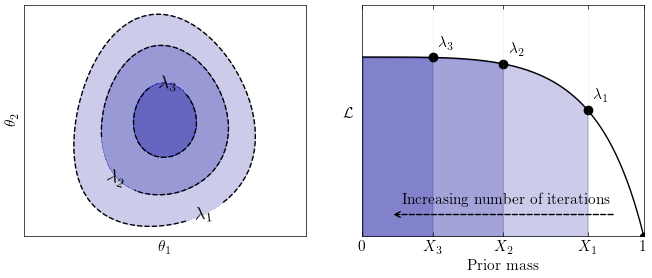

In [24]:

fig, [ax, ax2] = plt.subplots(1, 2, figsize = (8, 3))
CS = ax.contourf(x, y, Z1, levels = [0, 0.05, 0.2, 0.4], colors = [(0, 0, 0.6, 0.6), (0, 0, 0.6, 0.4), (0, 0, 0.6, 0.2)], filled = True, linestyles = {'solid', 'solid', 'solid'})
CS = ax.contour(x, y, Z1, levels = [0.05, 0.2, 0.4], colors = ['black', 'black', 'black'], linestyles = {'dashed', 'dashed', 'dashed'}, fmt = {0.1:'L1', 0.2:'L2', 0.3:'L3'})
ax.clabel(CS, fontsize=14, fmt = {0.05:'$\lambda_3$', 0.2:'$\lambda_2$', 0.4:'$\lambda_1$'}, colors = ['black'], inline = True, inline_spacing = 0.0001)
ax.set_xlim(-1, 1)
ax.set_ylim(-.4, .4)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("$\\theta_1$", fontsize = 11)
ax.set_ylabel("$\\theta_2$", fontsize = 11)

#ax.set_xlabel('Parameter space', fontsize = 11)



def sample_contour(x):
    return 1-np.exp(x**4)

xx = np.arange(0, 2, 0.001)
yy = sample_contour(xx)


dots = np.array([0, .25, .5, .80, 1])
scatter_dots = sample_contour(dots)

leb = np.array(['$\lambda_3$', '$\lambda_2$', '$\lambda_1$'])
mini_dots = dots[1:]
mini_vals = scatter_dots[1:]
for ii in range(3):
    ax2.annotate(xy = (mini_dots[ii]+0.02, mini_vals[ii]+0.1), text = leb[ii], fontsize = 11)

fill_x = np.arange(dots[0], dots[1], 0.001)
ax2.fill_between(fill_x, sample_contour(fill_x), y2 = -2, color = (0, 0, 0.6, 0.2))

fill_x = np.arange(dots[0], dots[2], 0.001)
ax2.fill_between(fill_x, sample_contour(fill_x), y2 = -2, color = (0, 0, 0.6, 0.2))

fill_x = np.arange(dots[0], dots[3], 0.001)
ax2.fill_between(fill_x, sample_contour(fill_x), y2 = -2, color = (0, 0, 0.6, 0.2))


ax2.scatter(dots[1:], scatter_dots[1:], color = 'black')
ax2.plot(xx, yy, color = 'black')
ax2.set_xlim(0, 1)
ax2.set_xticks(dots)
ax2.minorticks_off()

ax2.set_xticklabels([0, '$X_3$', '$X_2$', '$X_1$', '1'], fontsize = 11)
remove_ylabels = True
if remove_ylabels:
    ax2.set_yticks([])
    ax2.set_yticklabels([])
ax2.grid(alpha = 0.2)
ax2.set_ylim(-1.7, 0.5)
ax2.set_ylabel("$\mathcal{L}$", rotation = 0, labelpad = 10.0, fontsize = 11)
ax2.annotate("", xytext=(0.9, -1.5), xy=(0.1, -1.5), arrowprops=dict(arrowstyle="->", linestyle = 'dashed'))
ax2.annotate(text = "Increasing number of iterations", xy = (0.14, -1.4), fontsize = 11)

ax2.set_xlabel('Prior mass')
fig.savefig('./nested_sampling.pdf')
fig.savefig('../../figures/nested_sampling.pdf')
